In [ ]:
#CSCI 183 aditya ranade and austin wang

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import math
from sklearn.linear_model import LinearRegression

df1 = pd.read_csv("housing.csv")


df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#1. Load the dataset into a pandas dataframe and find the data types for each column in the dataset.  
df1.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
#2. Find the names of the columns of this dataframe. 
for col in df1.columns:
  print(col)

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity


In [ ]:
#3. Find how many numerical features exist in the dataset.
#housing median age, total rooms, total bedrooms, population, households, median income, median house value.
#Ruled out latitude and longitude because although they are numbers, it is similar to name and zipcode
#ruled out ocean proximity because it is not numerical
df1n = df1.drop(['longitude', 'latitude', 'ocean_proximity'], axis=1)
df1n

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
#4 Find the correlation matrix for this dataset. Report which features tend to have a high correlation with the target variable
#target variable: median_house_value
#features with high correlation to median_house_value are: median_income

#correlation matrix with all values
df1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


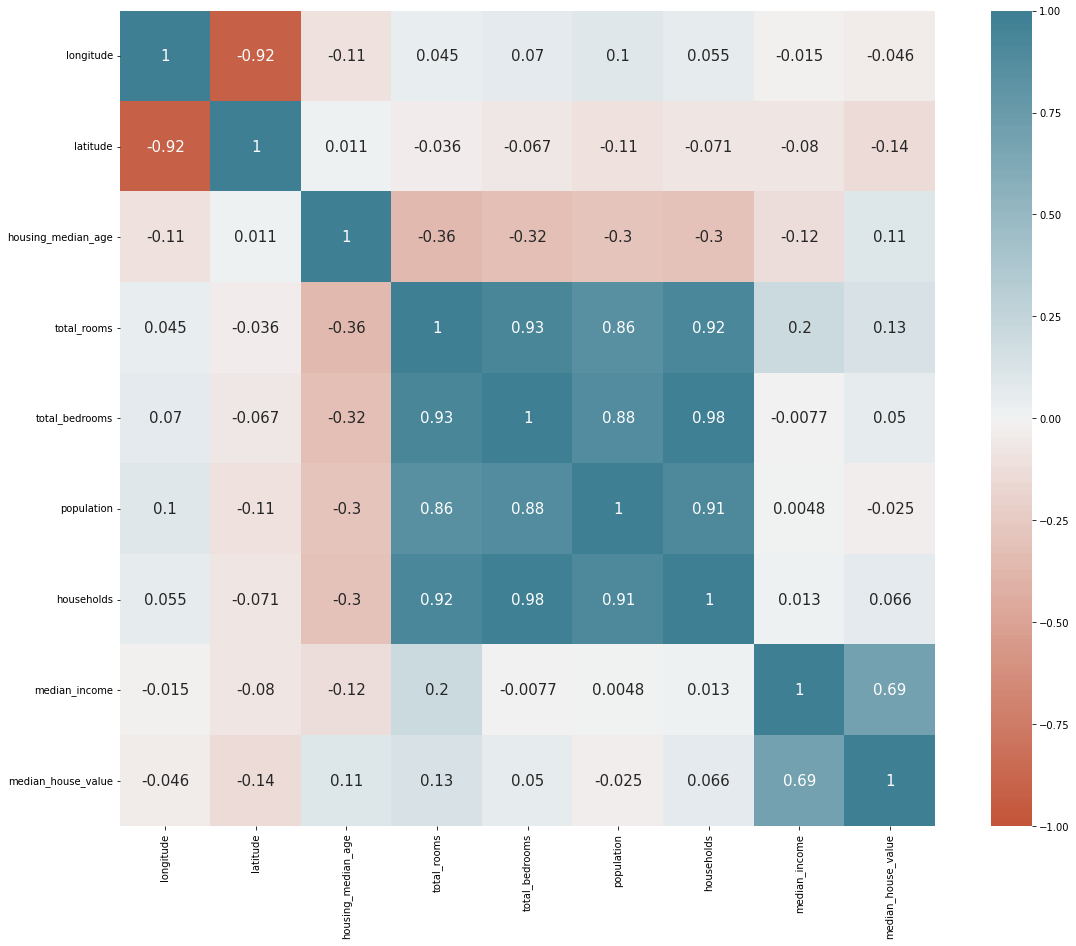

In [ ]:
#Correlation plot with all values
plt.subplots(figsize=(20,15))
sns.heatmap(
    df1.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True, annot_kws={'size': 15},
    square=True)

In [ ]:
#correlation matrix with only numerical values
df1n.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


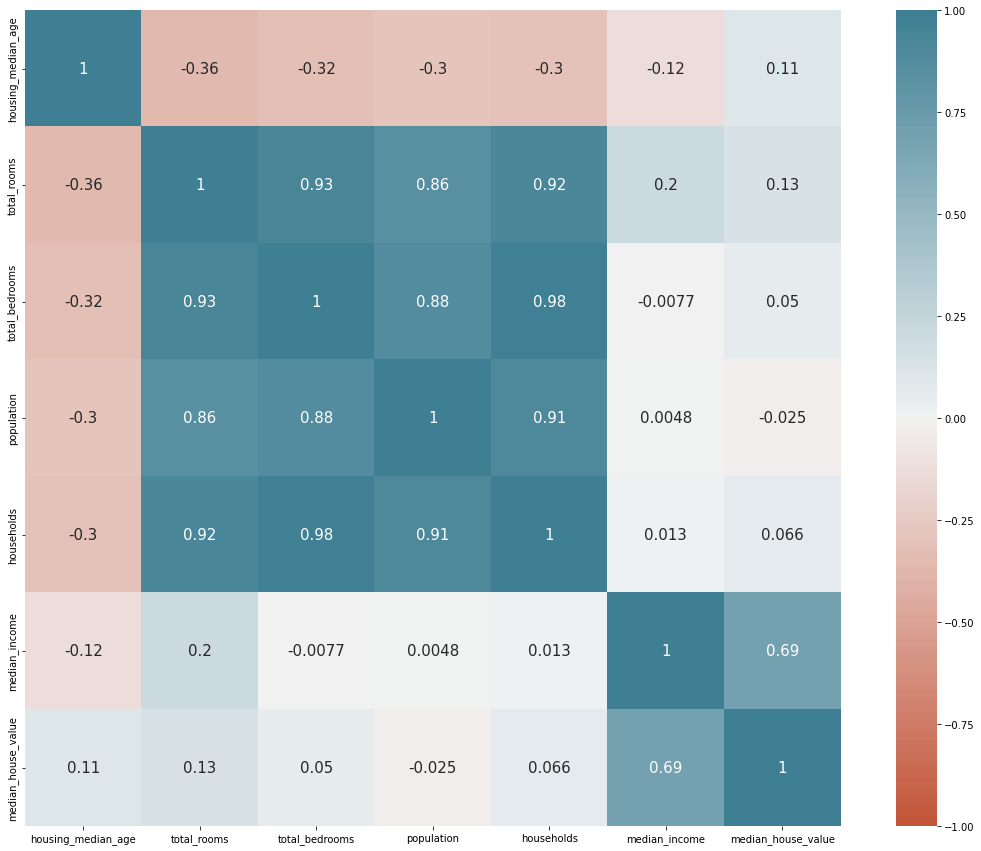

In [ ]:
#Correlation plot with only numerical values
plt.subplots(figsize=(20,15))
sns.heatmap(
    df1n.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True, annot_kws={'size': 15},
    square=True)

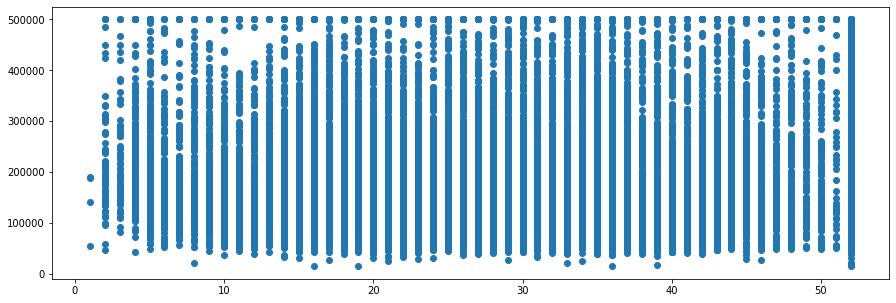

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df1['housing_median_age'], df1['median_house_value'], 'o') 

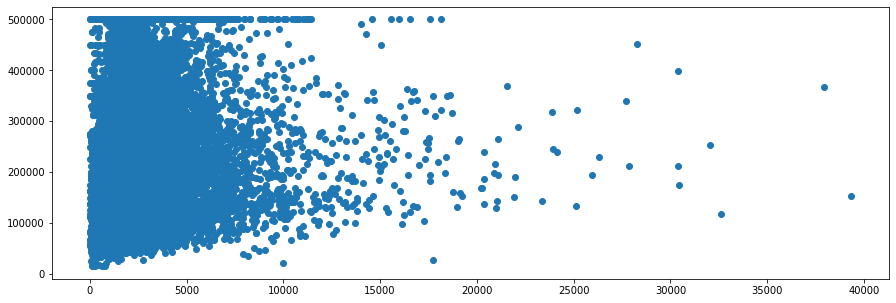

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df1['total_rooms'], df1['median_house_value'], 'o') 

In [ ]:
predictors = ['total_rooms']
X = df1[predictors]
y = df1['median_house_value']

lm = LinearRegression()
model = lm.fit(X, y)

print(f'intercept = {model.intercept_}')
print(f'coefficient = {model.coef_}')

pred_y = model.predict(X)
print(pred_y.shape)
print(pred_y)

intercept = 188152.5153420206
coefficient = [7.09597221]
(20640,)
[194396.9708832  238526.82203164 198562.30656806 ... 204146.8366941
 201351.02364498 207914.79793543]


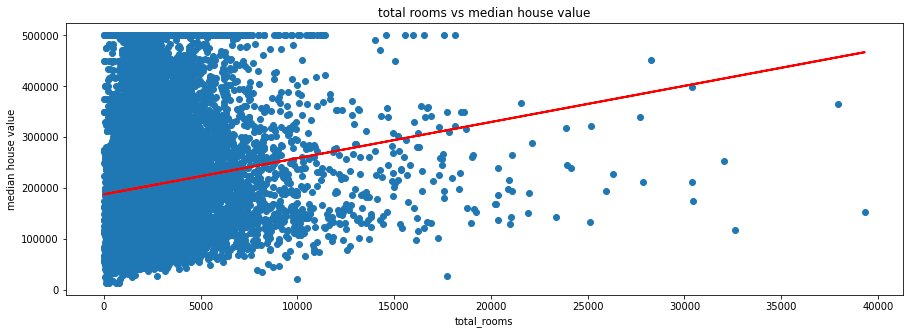

In [ ]:
# Plot regression against actual data
plt.figure(figsize=(15, 5))
plt.plot(df1['total_rooms'], df1['median_house_value'], 'o')
plt.plot(df1['total_rooms'], pred_y, 'r', linewidth=2)
plt.xlabel('total_rooms')
plt.ylabel('median house value')
plt.title('total rooms vs median house value')

plt.show()

In [ ]:
sum = 0
data = df1[["total_rooms","median_house_value"]].values
for i,j in data:
    pred_value = 188152.5153420206 + i * 7.09597221
    e = (pred_value - j) ** 2
    sum += e
print("total error of total_rooms predictor:", sum) #total error

total error of total_rooms predictor: 269885814833103.8


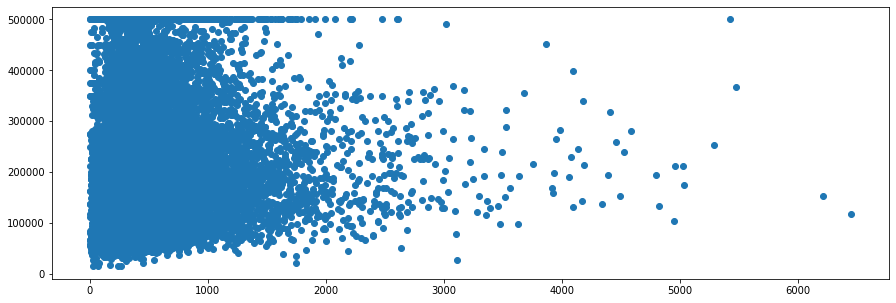

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df1['total_bedrooms'], df1['median_house_value'], 'o') 

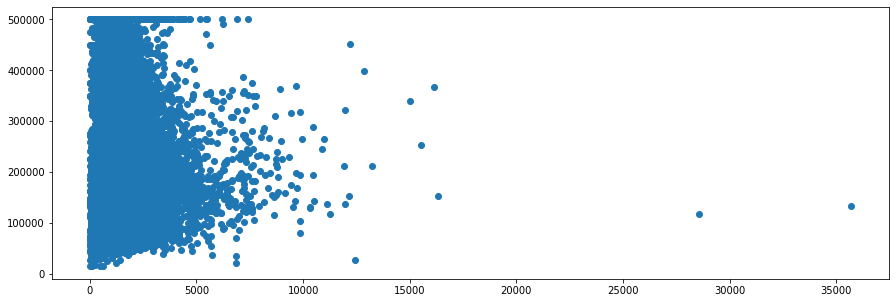

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df1['population'], df1['median_house_value'], 'o') 

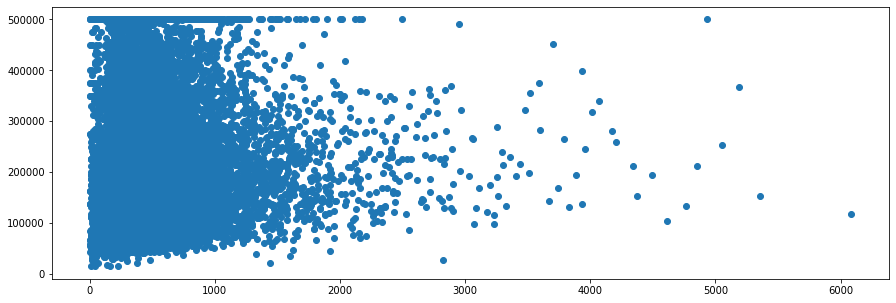

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df1['households'], df1['median_house_value'], 'o') 

In [ ]:
predictors = ['households']
X = df1[predictors]
y = df1['median_house_value']

lm = LinearRegression()
model = lm.fit(X, y)

print(f'intercept = {model.intercept_}')
print(f'coefficient = {model.coef_}')

pred_y = model.predict(X)
print(pred_y.shape)
print(pred_y)

intercept = 196928.57716233088
coefficient = [19.87277516]
(20640,)
[199432.54683194 219543.79528945 200446.05836488 ... 205533.48880472
 203864.17569165 207461.14799482]


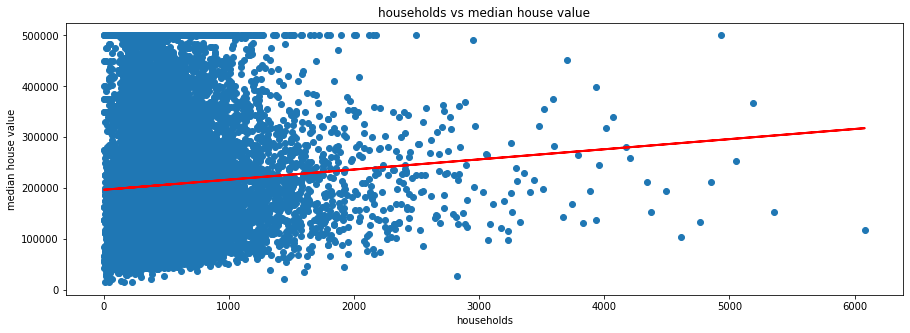

In [ ]:
# Plot regression against actual data
plt.figure(figsize=(15, 5))
plt.plot(df1['households'], df1['median_house_value'], 'o')
plt.plot(df1['households'], pred_y, 'r', linewidth=2)
plt.xlabel('households')
plt.ylabel('median house value')
plt.title('households vs median house value')

plt.show()

In [ ]:
sum = 0
data = df1[["households","median_house_value"]].values
for i,j in data:
    pred_value = 196928.57716233088 + i * 19.87277516
    e = (pred_value - j) ** 2
    sum += e
print("total error of households predictor:", sum) #total error

total error of households predictor: 273640515313598.38


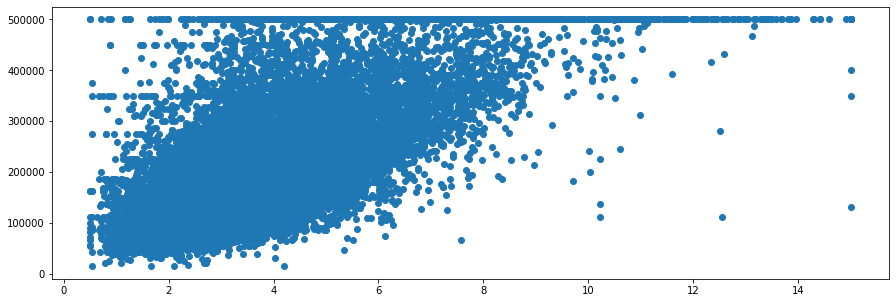

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df1['median_income'], df1['median_house_value'], 'o') 

In [ ]:
predictors = ['median_income']
X = df1[predictors]
y = df1['median_house_value']

lm = LinearRegression()
model = lm.fit(X, y)

print(f'intercept = {model.intercept_}')
print(f'coefficient = {model.coef_}')

pred_y = model.predict(X)
print(pred_y.shape)
print(pred_y)

intercept = 45085.57670326799
coefficient = [41793.8492019]
(20640,)
[393027.73007889 392033.03646789 348400.25790111 ... 116135.12034649
 123123.05193305 144914.36490692]


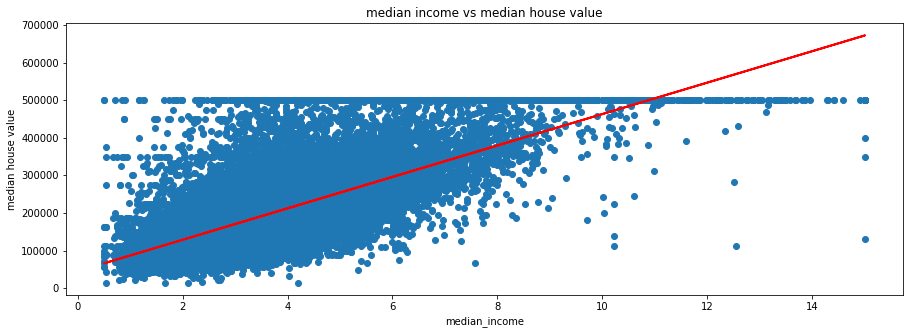

In [ ]:
# Plot regression against actual data
plt.figure(figsize=(15, 5))
plt.plot(df1['median_income'], df1['median_house_value'], 'o')
plt.plot(df1['median_income'], pred_y, 'r', linewidth=2)
plt.xlabel('median_income')
plt.ylabel('median house value')
plt.title('median income vs median house value')

plt.show()

In [ ]:
sum = 0
data = df1[["median_income","median_house_value"]].values
for i,j in data:
    pred_value = 45085.5767032679 + i * 41793.8492019
    e = (pred_value - j) ** 2
    sum += e
print("total error of median_income predictor:", sum) #total error

total error of median_income predictor: 144713469420465.72


In [ ]:
#6. Based on the graphs in step 5, identify features that have a linear relationship with the target variable.  
#Only median income seems to have a linear relationship with median household price

In [ ]:
observations = pd.DataFrame(columns = ['Feature', 'Slope', 'Intercept'])
observations = observations.append({'Feature': 'median_income', 'Slope': 41793.8492019, 'Intercept': 45085.57670326799}, ignore_index = True)
observations = observations.append({'Feature': 'total_rooms', 'Slope': 7.09597221, 'Intercept': 188152.5153420206}, ignore_index = True)
observations = observations.append({'Feature': 'households', 'Slope': 19.87277516, 'Intercept': 196928.57716233088},  ignore_index = True)
observations

,Feature,Slope,Intercept
0,median_income,41793.849202,45085.576703
1,total_rooms,7.095972,188152.515342
2,households,19.872775,196928.577162
